In [15]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [16]:
# Load the dataset from the csv file using pandas
data = pd.read_csv("/Users/rickichu/Desktop/AML-GitHub/creditcard.csv") 
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [18]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()
print("details of valid transaction")
valid.Amount.describe()

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315
Amount details of the fraudulent transaction
details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

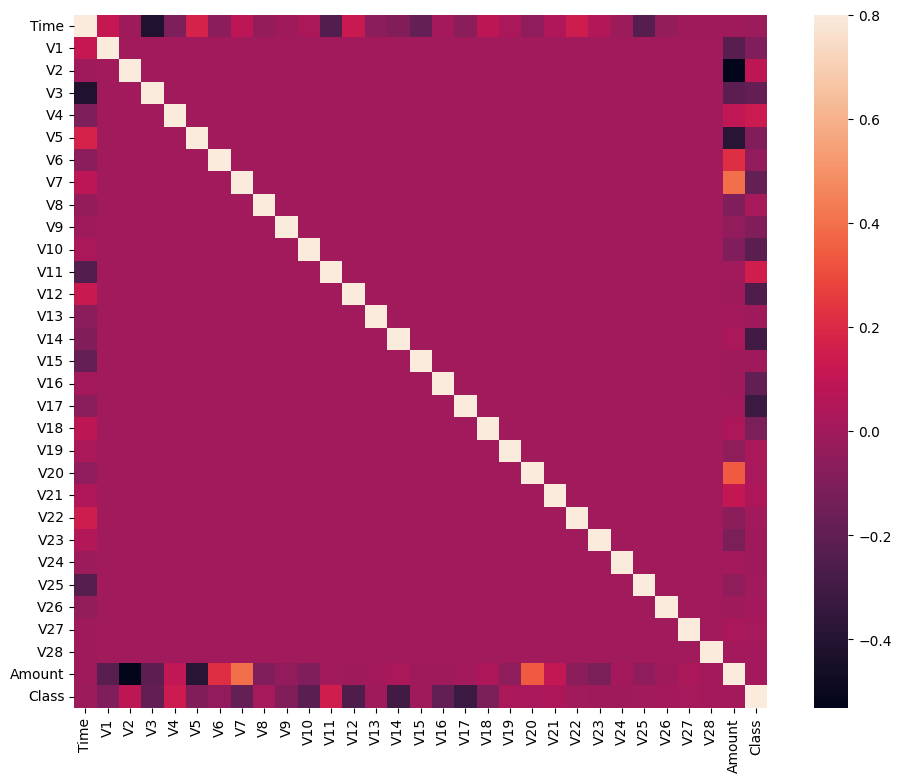

In [19]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()



In [20]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [21]:
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

In [22]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate and print the evaluation metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    """
    Function to print out classification metrics for a given model.
    
    Parameters:
    y_true: True labels
    y_pred: Predicted labels
    model_name: Name of the model being evaluated (default: "Model")
    
    Returns:
    A dictionary containing the accuracy, precision, recall, F1-score, and MCC of the model.
    """
    print(f"The model used is {model_name}")
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    MCC = matthews_corrcoef(y_true, y_pred)
    
    print(f"The accuracy is {acc}")
    print(f"The precision is {prec}")
    print(f"The recall is {rec}")
    print(f"The F1-Score is {f1}")
    print(f"The Matthews correlation coefficient is {MCC}")
    
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    # Printing the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    LABELS = ['Valid', 'Fraud']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
    # Return metrics for comparison
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1_score": f1, "mcc": MCC}



# Function to calculate an overall score for a model based on the average of multiple metrics
def calculate_overall_score(metrics):
    """
    Calculate the overall score by averaging the accuracy, precision, recall, F1-score, and MCC.
    
    Parameters:
    metrics: A dictionary of the evaluation metrics for a model.
    
    Returns:
    The overall score for the model.
    """
    return (metrics['accuracy'] + metrics['precision'] + metrics['recall'] + metrics['f1_score'] + metrics['mcc']) / 5




Evaluating Logistic Regression:
The model used is Logistic Regression
The accuracy is 0.9988939995084443
The precision is 0.7868852459016393
The recall is 0.4897959183673469
The F1-Score is 0.6037735849056604
The Matthews correlation coefficient is 0.6203249916054607

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



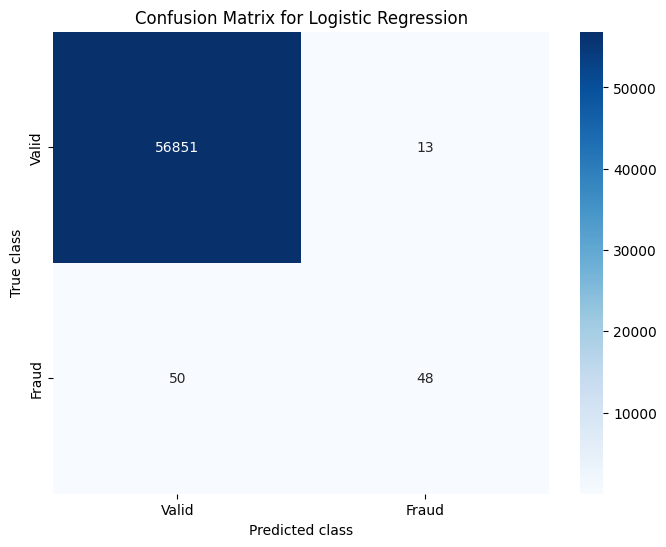


Evaluating Decision Tree:
The model used is Decision Tree
The accuracy is 0.9990519995786665
The precision is 0.6964285714285714
The recall is 0.7959183673469388
The F1-Score is 0.7428571428571428
The Matthews correlation coefficient is 0.7440457569036337

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



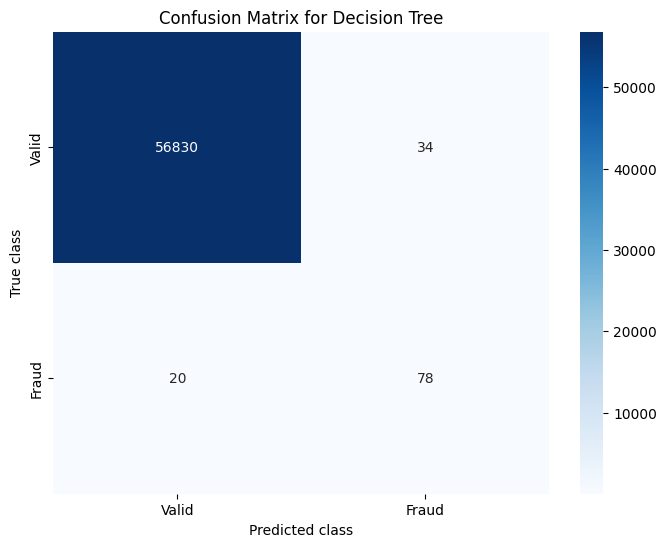


Evaluating Random Forest:
The model used is Random Forest
The accuracy is 0.9995962220427653
The precision is 0.987012987012987
The recall is 0.7755102040816326
The F1-Score is 0.8685714285714285
The Matthews correlation coefficient is 0.8747121626683524

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



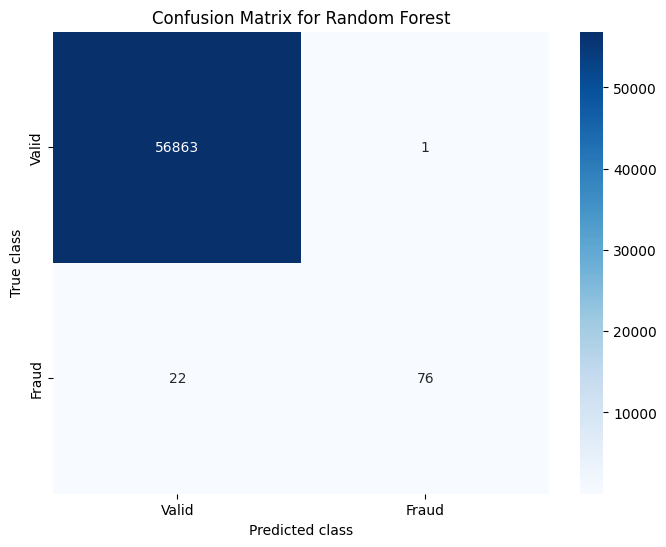

In [29]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier()

# Train and predict for Logistic Regression
log_reg.fit(xTrain, yTrain)
yPred_log_reg = log_reg.predict(xTest)

# Train and predict for Decision Tree
dec_tree.fit(xTrain, yTrain)
yPred_dec_tree = dec_tree.predict(xTest)

# Train and predict for Random Forest
rfc.fit(xTrain, yTrain)
yPred_rfc = rfc.predict(xTest)

# Evaluate each model and store the metrics
print("\nEvaluating Logistic Regression:")
log_reg_metrics = evaluate_model(yTest, yPred_log_reg, model_name="Logistic Regression")

print("\nEvaluating Decision Tree:")
dec_tree_metrics = evaluate_model(yTest, yPred_dec_tree, model_name="Decision Tree")

print("\nEvaluating Random Forest:")
rfc_metrics = evaluate_model(yTest, yPred_rfc, model_name="Random Forest")

In [31]:
# Calculate the overall scores for each model
log_reg_score = calculate_overall_score(log_reg_metrics)
dec_tree_score = calculate_overall_score(dec_tree_metrics)
rfc_score = calculate_overall_score(rfc_metrics)

# Compare and determine the best model
scores = {
    'Logistic Regression': log_reg_score,
    'Decision Tree': dec_tree_score,
    'Random Forest': rfc_score
}

best_model = max(scores, key=scores.get)
print(f"\nThe overall best model is: {best_model} with an overall score of: {scores[best_model]:.4f}")





The overall best model is: Random Forest with an overall score of: 0.9011


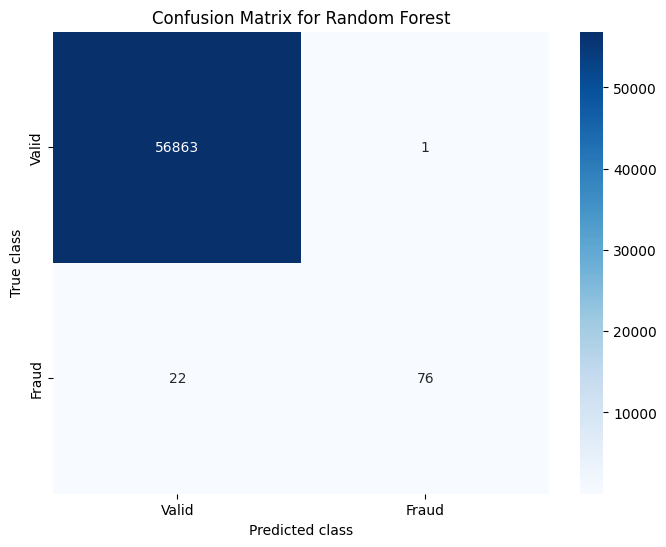

In [32]:
# Confusion Matrix for the best model
if best_model == 'Logistic Regression':
    yPred_best = yPred_log_reg
elif best_model == 'Decision Tree':
    yPred_best = yPred_dec_tree
else:
    yPred_best = yPred_rfc

# Display confusion matrix for the best model
conf_matrix = confusion_matrix(yTest, yPred_best)
LABELS = ['Valid', 'Fraud']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title(f"Confusion Matrix for {best_model}")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

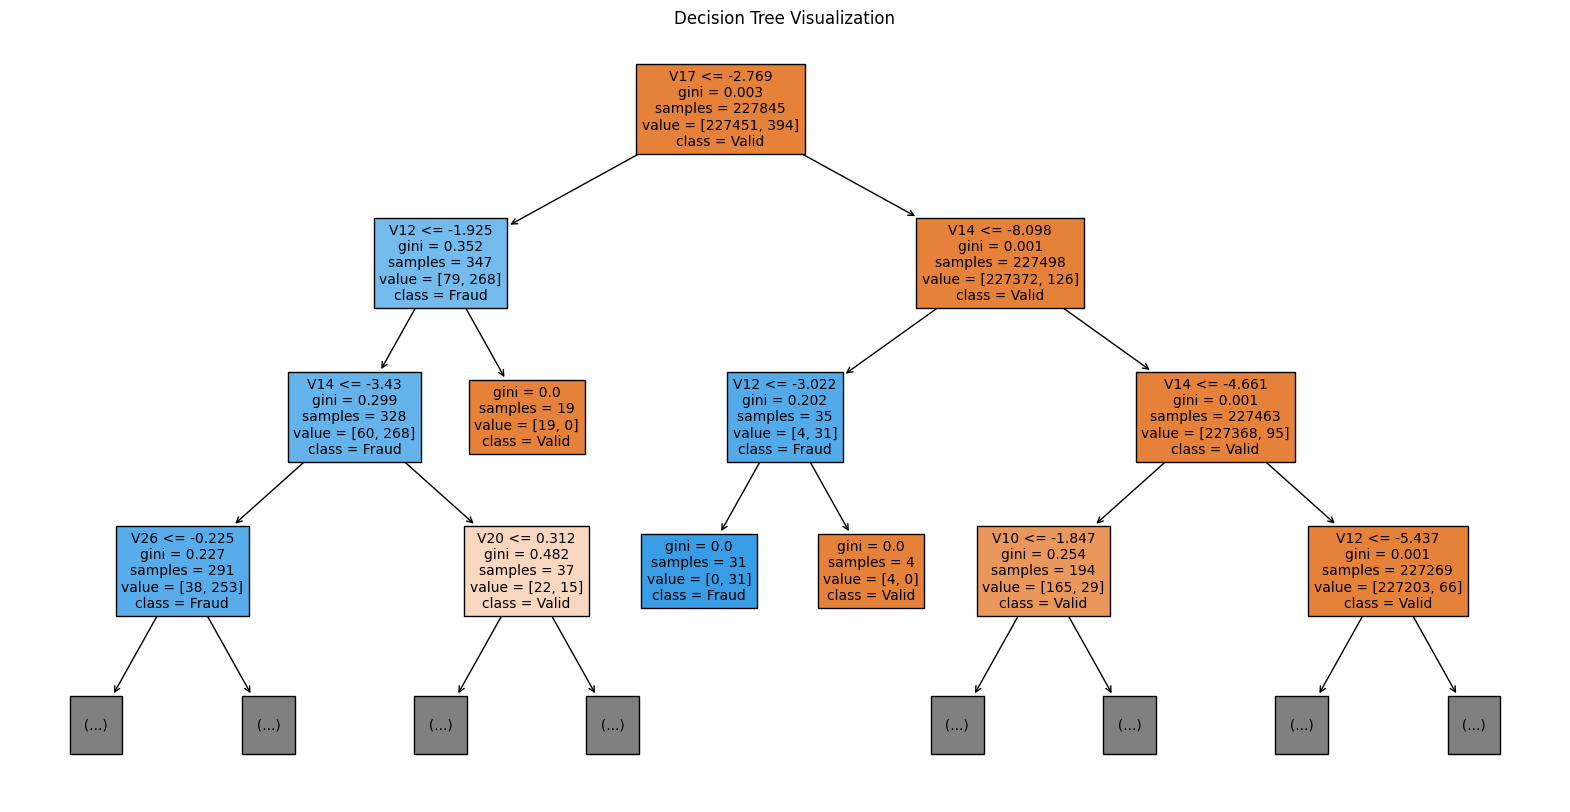

In [33]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dec_tree, filled=True, feature_names=X.columns, class_names=['Valid', 'Fraud'], max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()